In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
import io
import chardet

In [27]:
from google.colab import files
uploaded = files.upload()


Saving IMDb Movies India.csv to IMDb Movies India (1).csv


In [29]:
encoding = chardet.detect(uploaded['IMDb Movies India (1).csv'])['encoding']
df = pd.read_csv(io.BytesIO(uploaded['IMDb Movies India (1).csv']), encoding=encoding)
print(df)

                                     Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes            Director           A

In [30]:
# Handling missing values
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

In [31]:
# Feature Engineering
features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
X = pd.get_dummies(df[features])
y = df['Rating']

In [32]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Model selection and training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predictions on the test set
y_pred = model.predict(X_test)

In [36]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.8245823701482947e+25


Text(0.5, 1.0, 'Actual vs. Predicted Ratings')

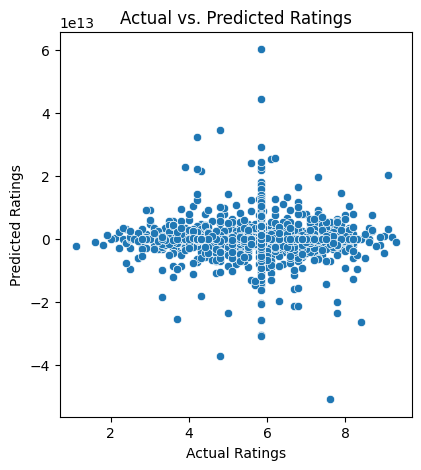

In [53]:
# Visualize actual vs. predicted ratings
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')

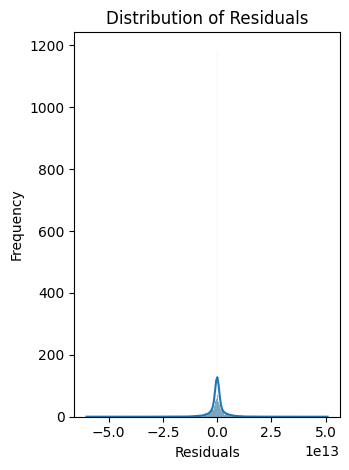

In [57]:
# Visualize residuals
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

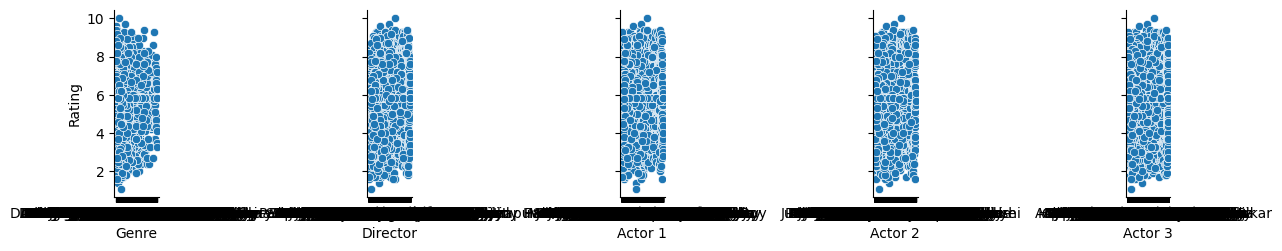

In [58]:
# Visualizations
# 1. Pairplot to visualize relationships between features and ratings
sns.pairplot(df, x_vars=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], y_vars='Rating', kind='scatter')
plt.show()

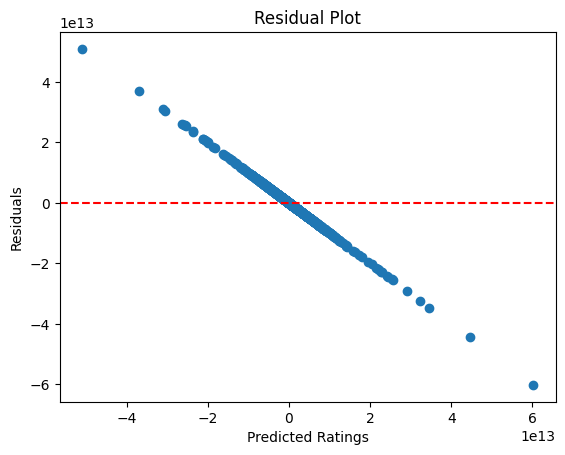

In [59]:
# 2. Residual plot to check for homoscedasticity
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [60]:
# Feature Importance Analysis
f_scores, _ = f_regression(X_train_scaled, y_train)
feature_importance = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores})
feature_importance = feature_importance.sort_values(by='F-Score', ascending=False)

In [61]:
# Display the top N important features
top_features = 5
print(f'Top {top_features} Important Features:')
print(feature_importance.head(top_features))

Top 5 Important Features:
                Feature     F-Score
299         Genre_Drama  121.243404
7527  Actor 1_Dev Anand   76.129077
262   Genre_Documentary   70.400975
0          Genre_Action   68.361326
7808    Actor 1_Govinda   59.675526
